# Aula 17 - SVR Kernel Não Linear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Real estate.csv')

In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Plotar gráficos

Text(0.5, 1.0, 'Preço do imóvel x distância à estação do metrô mais próxima')

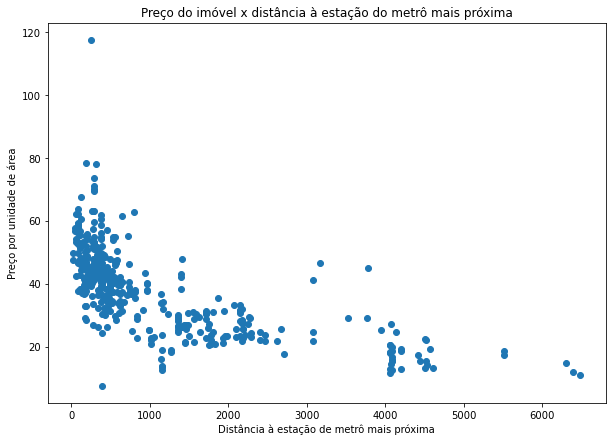

In [4]:
#Escolhemos a coluna "X3 distance to the neares MRT station" para a visualização
plt.figure(figsize=(10,7))
plt.scatter(x=df['X3 distance to the nearest MRT station'], y = df['Y house price of unit area'])
plt.xlabel('Distância à estação de metrô mais próxima')
plt.ylabel('Preço por unidade de área')
plt.title('Preço do imóvel x distância à estação do metrô mais próxima')

In [5]:
#Definindo as variáveis
x = df.sort_values(by=['X3 distance to the nearest MRT station'])['X3 distance to the nearest MRT station'].values.reshape(-1, 1)
y = df.sort_values(by=['X3 distance to the nearest MRT station'])['Y house price of unit area'].values

In [6]:
###Primeira tentativa e SVR com Kernel não linear
C = 1
epsilon = 10
first_model = SVR(kernel='rbf', C=C, epsilon=epsilon)
svr = first_model.fit(x, y)

In [7]:
y_predict = svr.predict(x)

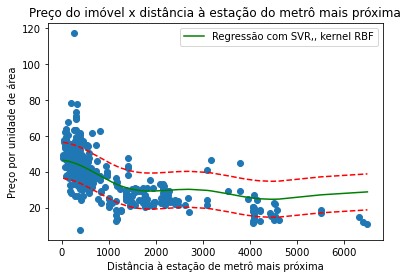

In [8]:
plt.figure()
plt.scatter(x=x,y=y)
plt.plot(x, y_predict, color='green', label='Regressão com SVR,, kernel RBF')
plt.plot(x, y_predict+epsilon, color='red',linestyle='--')
plt.plot(x, y_predict-epsilon, color='red',linestyle='--')
plt.xlabel('Distância à estação de metrô mais próxima')
plt.ylabel('Preço por unidade de área')
plt.title('Preço do imóvel x distância à estação do metrô mais próxima')
plt.legend()
plt.show()

### Procurando os melhores parâmetros por meio do Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [10]:
parameters = [{'kernel':['rbf'],
               'gamma':[1e-4,1e-3,0.01,0.1,0.2,0.5,0.6,1],
               'C': [1, 10, 100, 1000, 10000]
}]
svr_grid_search = GridSearchCV(SVR(epsilon=10), parameters)
svr_grid_search.fit(x,y)

GridSearchCV(estimator=SVR(epsilon=10),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 1],
                          'kernel': ['rbf']}])

In [11]:
svr_grid_search.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [12]:
y_predict_grid_search = svr_grid_search.predict(x)

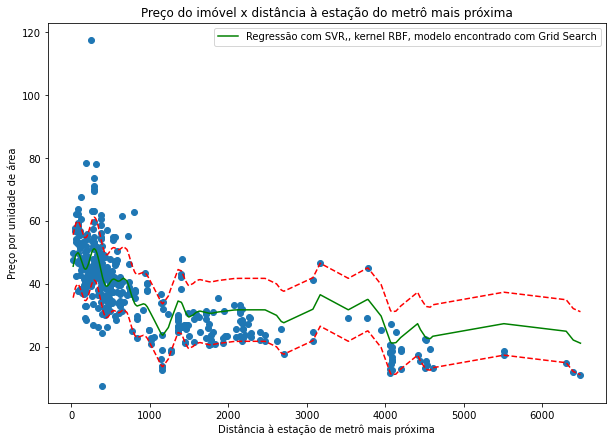

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(x=x,y=y)
plt.plot(x, y_predict_grid_search, color='green', label='Regressão com SVR,, kernel RBF, modelo encontrado com Grid Search')
plt.plot(x, y_predict_grid_search+epsilon, color='red',linestyle='--')
plt.plot(x, y_predict_grid_search-epsilon, color='red',linestyle='--')
plt.xlabel('Distância à estação de metrô mais próxima')
plt.ylabel('Preço por unidade de área')
plt.title('Preço do imóvel x distância à estação do metrô mais próxima')
plt.legend()
plt.show()